In [1]:
import pickle
url = r'C:\Users\joth1\Documents\Itau-Python\cienciaDados\ArvoreDecisao\python-analytics-ArvoreDecisao\credit.pkl'

with open(url, 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_teste, y_teste = pickle.load(f)

In [2]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(
    n_estimators=10,  # é o número de arvores de decisão que iremos criar. Lembrando que se criar 100 arvores e 70 disserem sim e 30 disserem não. Então a resposta será Sim, porque utilizamos o voto da maioria 
    criterion='entropy',
    random_state=0
) 

In [3]:
random_forest.fit(x_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [4]:
previsao = random_forest.predict(x_teste)
previsao

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [5]:
y_teste

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [6]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

accuracy = accuracy_score(y_teste, previsao)
accuracy

0.8395531549226615

0.8395531549226615

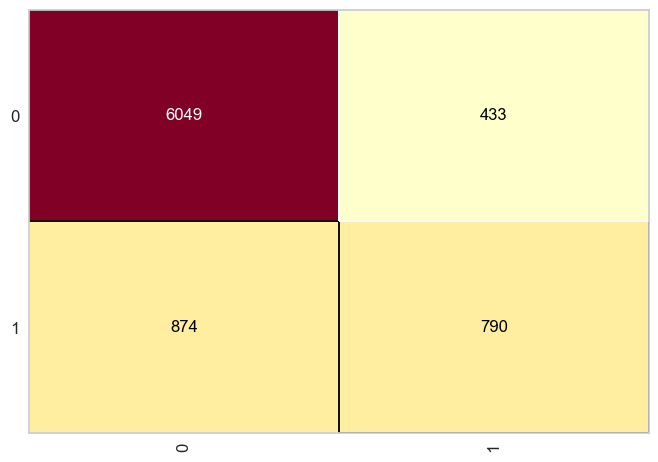

In [7]:
cm = ConfusionMatrix(random_forest)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_teste, y_teste)

### O algoritmo consegue identifica 93% dos clientes que irão pagar, mas somente 87% está correto (confiabilidade)
#### O algoritmo consegue identifica 47% dos clientes que não irão pagar, mas somente 65% está correto (confiabilidade)

In [8]:
print(classification_report(y_teste, previsao))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6482
           1       0.65      0.47      0.55      1664

    accuracy                           0.84      8146
   macro avg       0.76      0.70      0.72      8146
weighted avg       0.83      0.84      0.83      8146

